# Client Segmentation

In this project we are going to explore a dataset which refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. We are going to stablish client categories based on their activity.

In the dataset we have two categorical features:

- Channel: Horeca (Hotel/Restaurant/Café) or Retail channel.
- Region: Lisboa, Oporto, Other.

What we are going to do is:

- Take a look at the dataset to see the features in play and get first impressions.
- Use k-means clustering to detect patterns in clients activity.
- Try as well mean shift
- Visualize our data

The dataset looks like so:

   Channel  Region  Fresh  Milk  Grocery  Frozen   D_P  Delicassen
0        2       3  12669  9656     7561     214  2674        1338
1        2       3   7057  9810     9568    1762  3293        1776
2        2       3   6353  8808     7684    2405  3516        7844
3        1       3  13265  1196     4221    6404   507        1788
4        2       3  22615  5410     7198    3915  1777        5185


<Axes: >

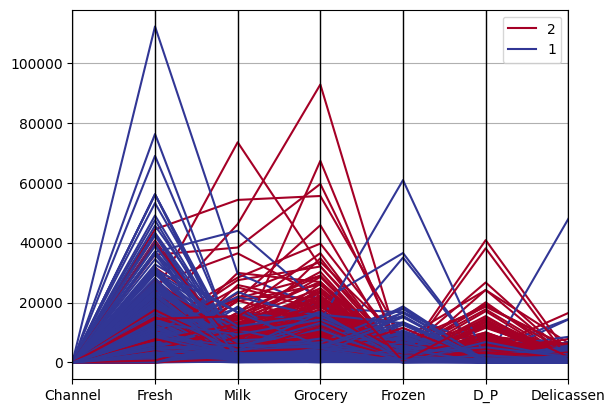

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(
    "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv"
)
df = df.rename(
    columns={"Detergents_Paper": "D_P"},
)
print(df.head())

# Normalizign our data to better fit the graph
df_norm = df.copy()
for column in df_norm.columns:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (
        df_norm[column].max() - df_norm[column].min()
    )


pd.plotting.parallel_coordinates(
    df,
    "Channel",
    colormap=plt.get_cmap("RdYlBu"),
    cols=["Channel", "Fresh", "Milk", "Grocery", "Frozen", "D_P", "Delicassen"],
)

Based on this data alone, we can see that Retail clients (Channel 1 in the plot) have higher values in the columns Milk, Grocery and Detergents/Papers. Meanwhile, Horeca clients (0 in the plot), have higher values in the columns Fresh, Frozen, and Delicassen.

From the pairplot we can also see a correlation between Grocery and D_P categories.

Now we are going to train a couple of different models, and see how they behave for this sort of data.

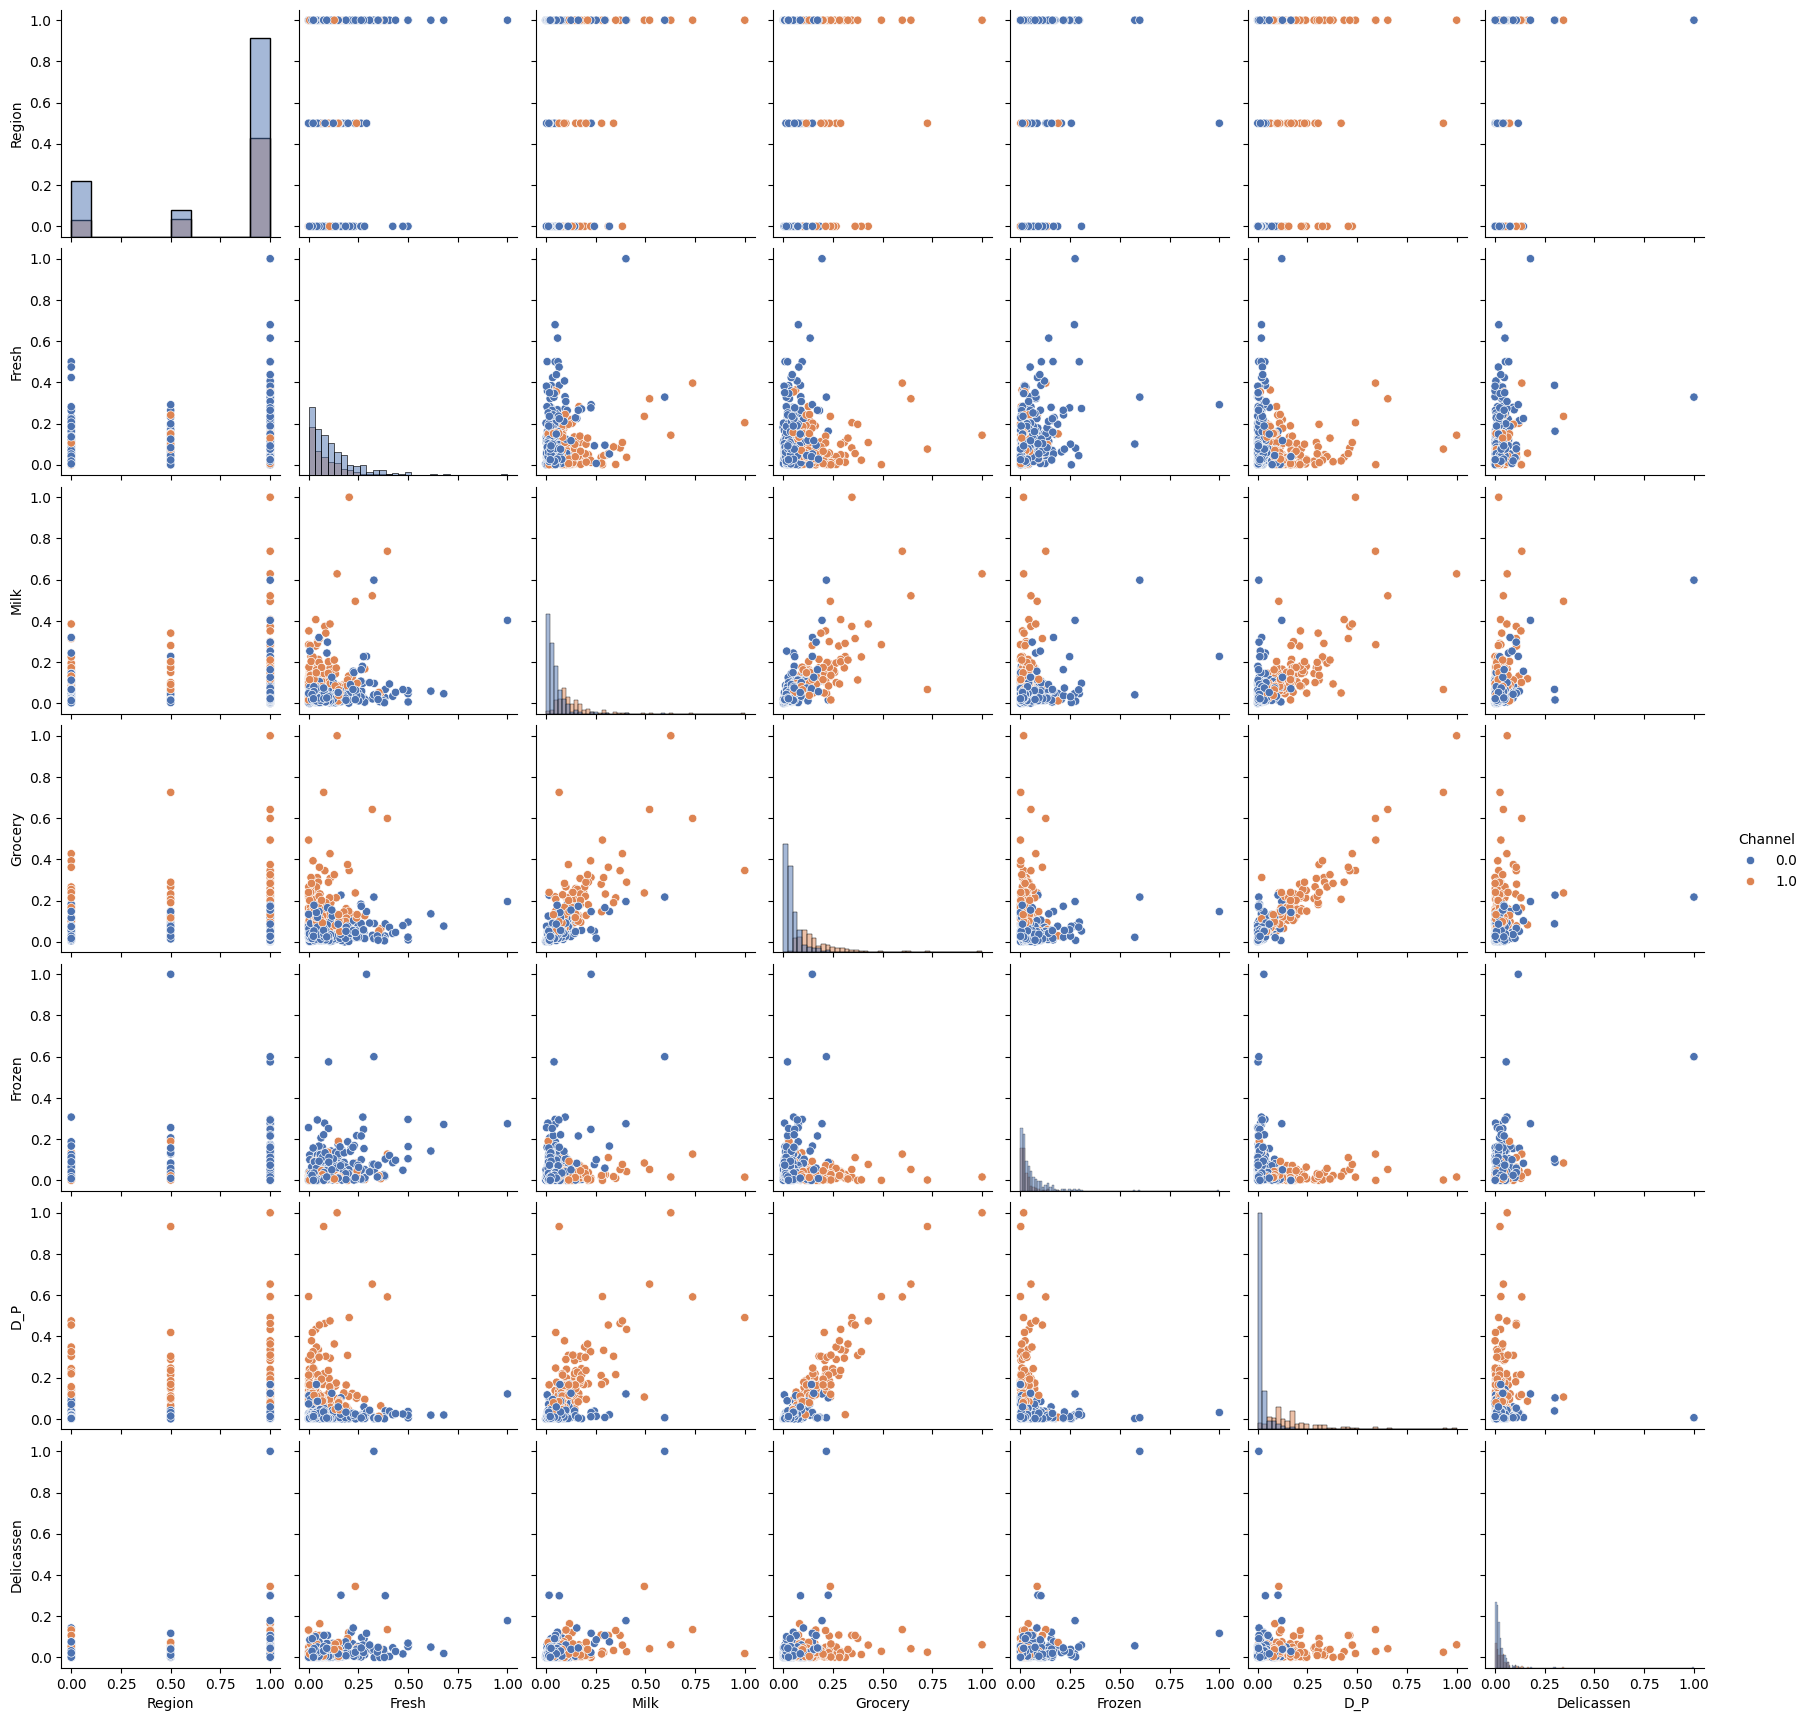

In [137]:
sns.pairplot(df_norm, hue="Channel", diag_kind="hist", palette="deep")

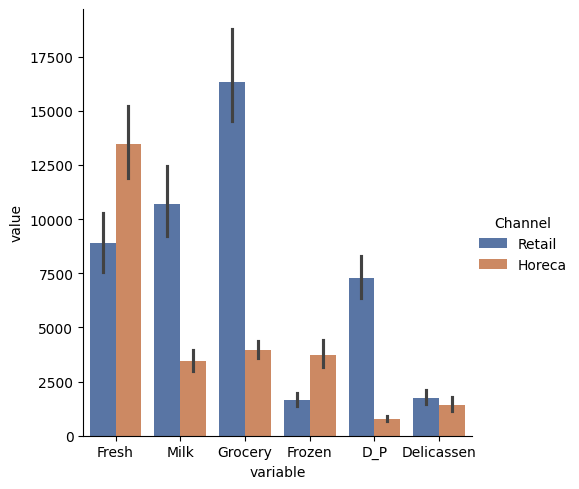

In [138]:
# We are going to add a column index and melt the df to better suit it for a barchart.

df["index"] = df.index
melted = df.drop("Region", axis=1)
melted = pd.melt(melted, id_vars=["Channel", "index"])
melted["Channel"] = melted["Channel"].map({1: "Horeca", 2: "Retail"})

sns.catplot(melted, kind="bar", y="value", x="variable", hue="Channel", palette="deep")

From this chart, we get a good look at the annual spending for both Retail and Horeca channels. Same as the first graph, we can see a prevalence of Retail clients in Milk, Grocery, and D_P categories.

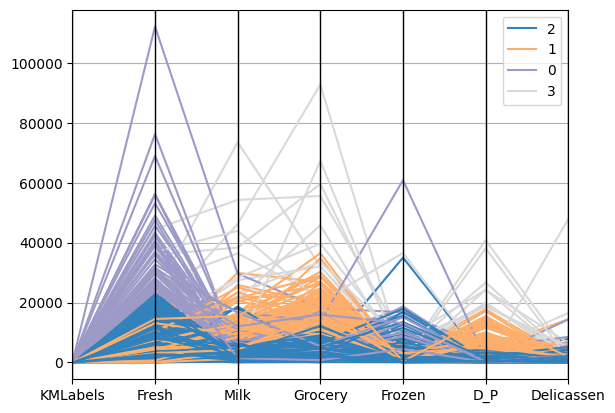

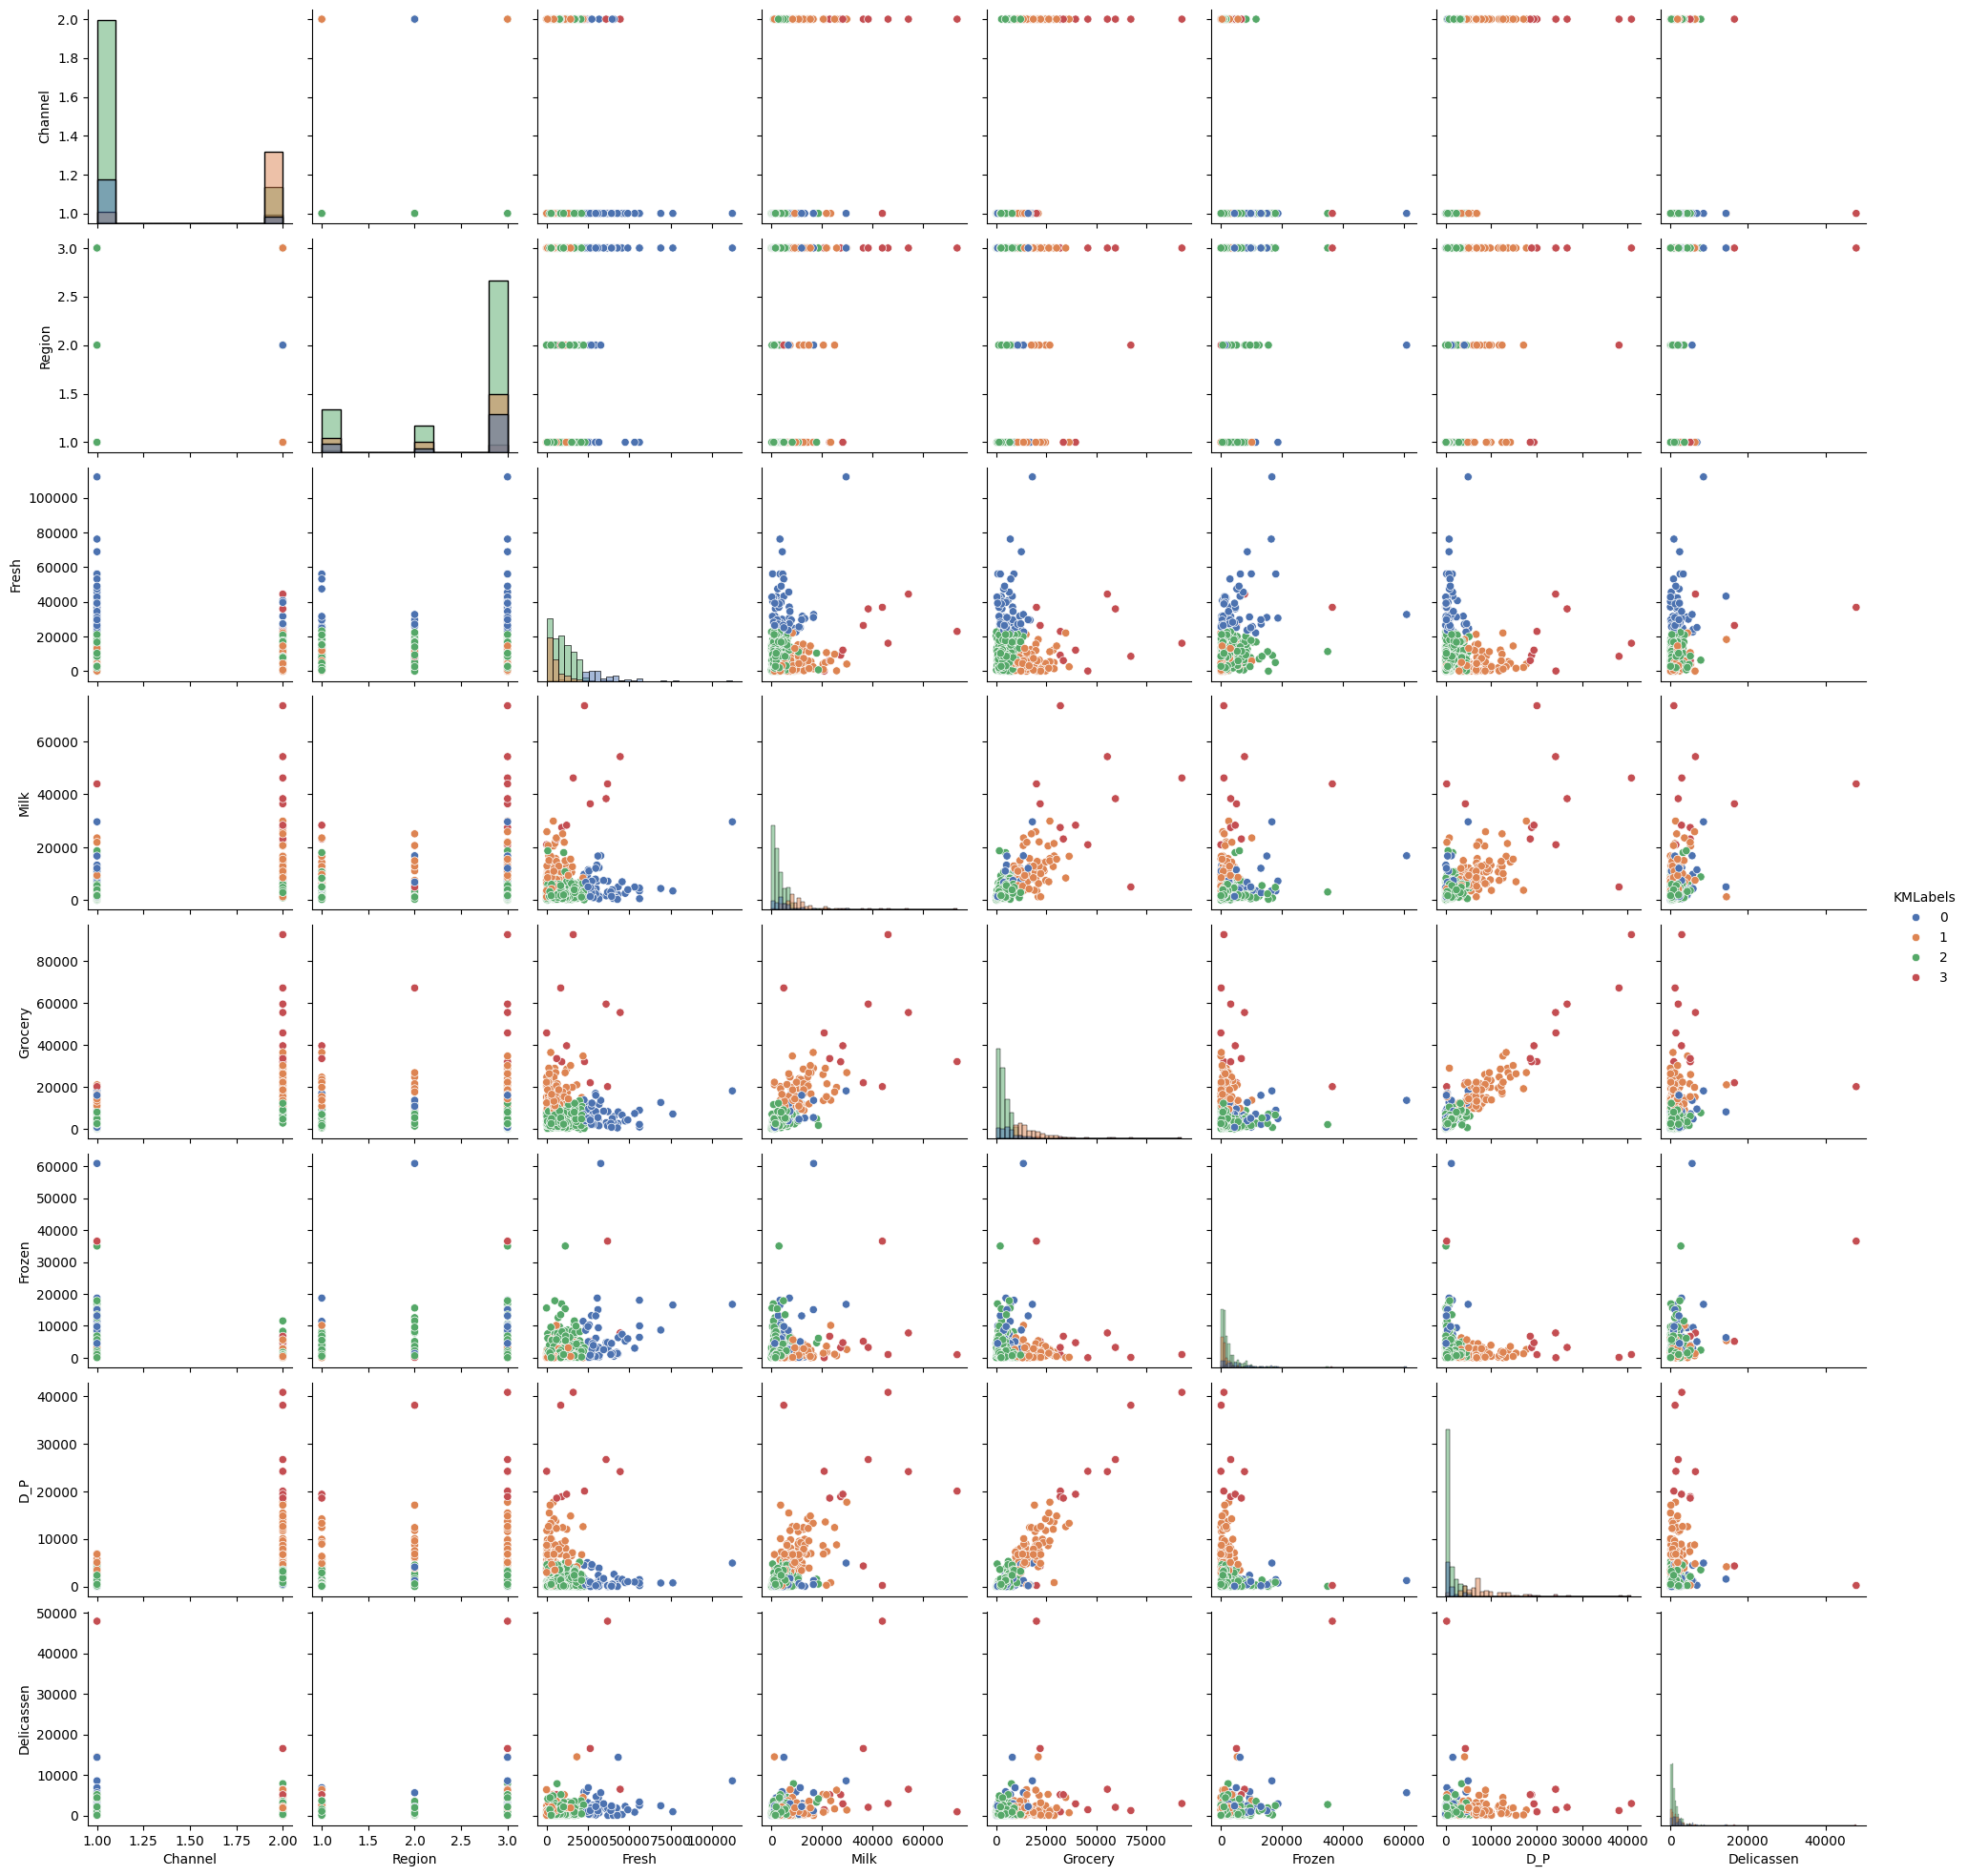

In [142]:
from sklearn import metrics
from sklearn.cluster import KMeans, AffinityPropagation


kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10)
kmeans_rand = KMeans(init="random", n_clusters=4, n_init=10)
kmeans.fit(df)
kmeans_rand.fit(df)

df['KMLabels'] = kmeans.labels_
df.drop(["Channel", "Region"], axis=1)

pd.plotting.parallel_coordinates(
    df,
    'KMLabels',
    colormap=plt.get_cmap("tab20c"),
    cols=["KMLabels", "Fresh", "Milk", "Grocery", "Frozen", "D_P", "Delicassen"],
)

sns.pairplot(df, hue="KMLabels", diag_kind="hist", palette="deep")


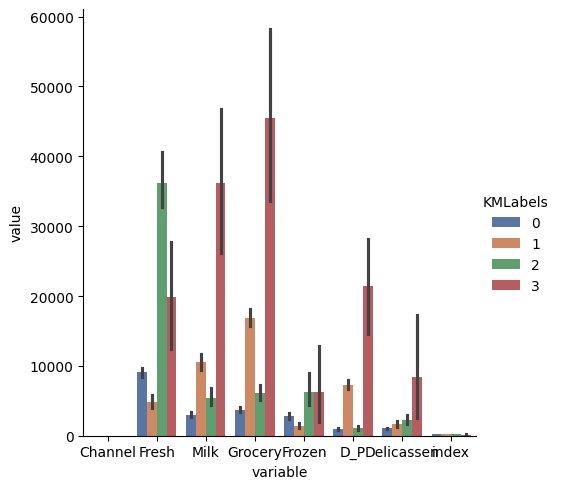

In [140]:
melted = df.drop("Region", axis=1)
melted = pd.melt(melted, id_vars=["KMLabels"])

sns.catplot(melted, kind="bar", y="value", x="variable", hue="KMLabels", palette="deep")